In [17]:
import pandas as pd
import numpy as np
import scipy
#linkage:階層型クラスタリング、dendrogram:樹形図、fcluster:クラスタリングの結果を得る
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

df = pd.read_csv('SSDSE-C-2023.csv',skiprows=1,encoding="shift-jis")
df.head()

,地域コード,都道府県,市,世帯人員,食料（合計）,01 穀類,米,食パン,他のパン,生うどん・そば,...,すし（外食）,和食,中華食,洋食,焼肉,ハンバーガー,他の主食的外食,喫茶代,飲酒代,学校給食
0,R00000,全国,全国,2.93,965949,79597,21869,10293,21476,3609,...,13397,19108,3953,9064,6135,5434,40377,6421,7757,9507
1,R01100,北海道,札幌市,2.79,940138,80069,27317,9192,18056,3218,...,17825,21595,3534,13480,6833,4132,22246,4770,9182,12578
2,R02201,青森県,青森市,2.86,917727,74692,20976,8441,17808,3548,...,12142,13385,2345,5862,6283,4556,16475,3076,4739,10485
3,R03201,岩手県,盛岡市,3.06,943800,79493,22138,8585,20439,3360,...,11933,9918,2004,5168,5356,4310,31887,3661,6517,10519
4,R04100,宮城県,仙台市,2.96,970750,76748,19328,9344,21631,3202,...,12114,16270,2691,7772,5067,4995,30051,5410,6449,10094


In [18]:
#最初の行をdrop
df=df.drop(0,axis=0)
#都道府県をindexにする。地域コードと市をdrop
df=df.drop(['地域コード','市'],axis=1)
#都道府県をindexにする
df=df.set_index('都道府県')
df = df.astype(float)
df.head()

,世帯人員,食料（合計）,01 穀類,米,食パン,他のパン,生うどん・そば,乾うどん・そば,パスタ,中華麺,...,すし（外食）,和食,中華食,洋食,焼肉,ハンバーガー,他の主食的外食,喫茶代,飲酒代,学校給食
都道府県,,,,,,,,,,,,,,,,,,,,,
北海道,2.79,940138.0,80069.0,27317.0,9192.0,18056.0,3218.0,2332.0,1290.0,4285.0,...,17825.0,21595.0,3534.0,13480.0,6833.0,4132.0,22246.0,4770.0,9182.0,12578.0
青森県,2.86,917727.0,74692.0,20976.0,8441.0,17808.0,3548.0,2177.0,1229.0,5851.0,...,12142.0,13385.0,2345.0,5862.0,6283.0,4556.0,16475.0,3076.0,4739.0,10485.0
岩手県,3.06,943800.0,79493.0,22138.0,8585.0,20439.0,3360.0,2309.0,1358.0,6540.0,...,11933.0,9918.0,2004.0,5168.0,5356.0,4310.0,31887.0,3661.0,6517.0,10519.0
宮城県,2.96,970750.0,76748.0,19328.0,9344.0,21631.0,3202.0,1990.0,1395.0,5181.0,...,12114.0,16270.0,2691.0,7772.0,5067.0,4995.0,30051.0,5410.0,6449.0,10094.0
秋田県,2.73,930063.0,70765.0,19497.0,7874.0,16883.0,3532.0,4397.0,1167.0,5573.0,...,15033.0,15693.0,2238.0,5277.0,7974.0,3634.0,25711.0,3415.0,6773.0,11509.0


In [35]:
#linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
#ウォード法
L = linkage(df, method='complete', metric='euclidean')

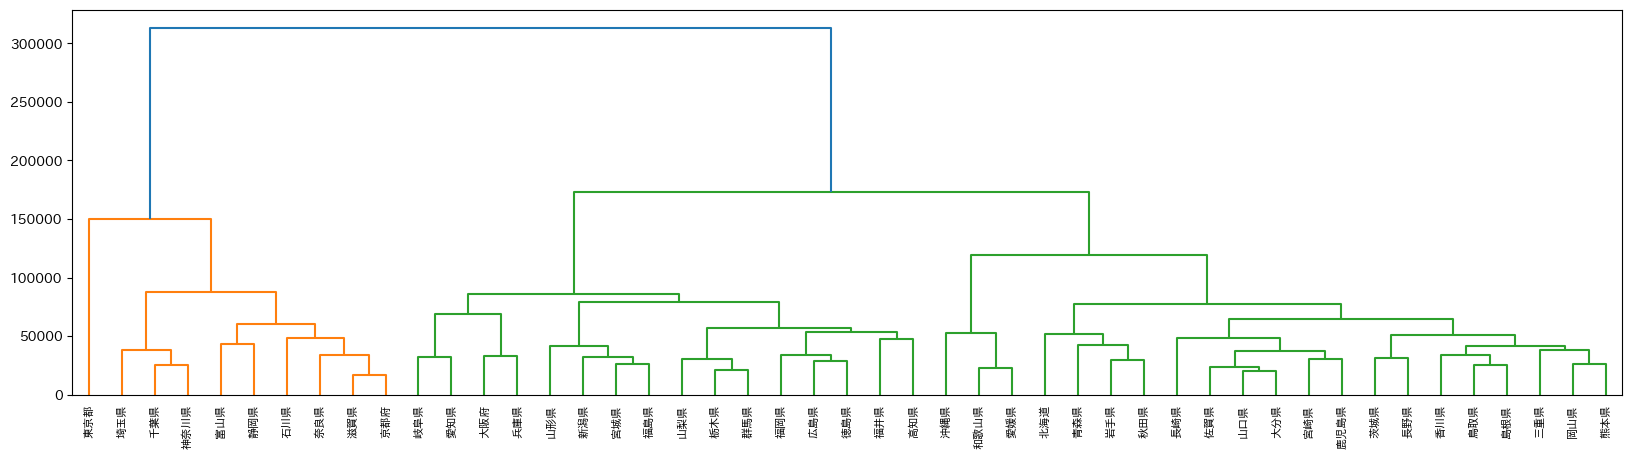

In [36]:
#樹形図
import matplotlib.pyplot as plt
# !pip install japanize-matplotlib
import japanize_matplotlib
fig, ax = plt.subplots(figsize=(20,5))
ax = dendrogram(L,labels=df.index)
fig.show()

In [37]:
#fcluster:任意の深さで木を切り、クラスタリング
#criterion: maxclust:
F = fcluster(L, t = 4, criterion = 'maxclust')
for index,f in enumerate(F):
  print(df.index[index] +' : '+ str(f))

北海道 : 4
青森県 : 4
岩手県 : 4
宮城県 : 3
秋田県 : 4
山形県 : 3
福島県 : 3
茨城県 : 4
栃木県 : 3
群馬県 : 3
埼玉県 : 1
千葉県 : 1
東京都 : 2
神奈川県 : 1
新潟県 : 3
富山県 : 1
石川県 : 1
福井県 : 3
山梨県 : 3
長野県 : 4
岐阜県 : 3
静岡県 : 1
愛知県 : 3
三重県 : 4
滋賀県 : 1
京都府 : 1
大阪府 : 3
兵庫県 : 3
奈良県 : 1
和歌山県 : 4
鳥取県 : 4
島根県 : 4
岡山県 : 4
広島県 : 3
山口県 : 4
徳島県 : 3
香川県 : 4
愛媛県 : 4
高知県 : 3
福岡県 : 3
佐賀県 : 4
長崎県 : 4
熊本県 : 4
大分県 : 4
宮崎県 : 4
鹿児島県 : 4
沖縄県 : 4
